In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [3]:
ds = pd.read_excel('locationThird.xlsx', sheet_name='Reviews', decimal=",", engine='openpyxl')
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq
userName,54444,54444,Maurice M@MauriceM171,1
userLocation,54444,12452,"['London', ' UK']",2653
userISO,54444,274,UK,21840


In [13]:
newDs = ds.groupby('userISO')['userISO'].count()
newDs = newDs.to_frame()
newDs = newDs.rename(columns={'userISO': 'iso'})
newDs.sort_values(by=['iso'], inplace=True, ascending=False)
newDs.reset_index(inplace=True, level=['userISO'])
newDs.head(30)

,userISO,iso
0,UK,21840
1,US,13252
2,AU,2721
3,CA,2224
4,ES,859
5,IE,847
6,IN,684
7,NL,624
8,DE,565
9,FR,559


In [22]:
dsOnlyISO = ds[ds['userISO'].str.len() == 2]

/home/tosk/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tosk/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


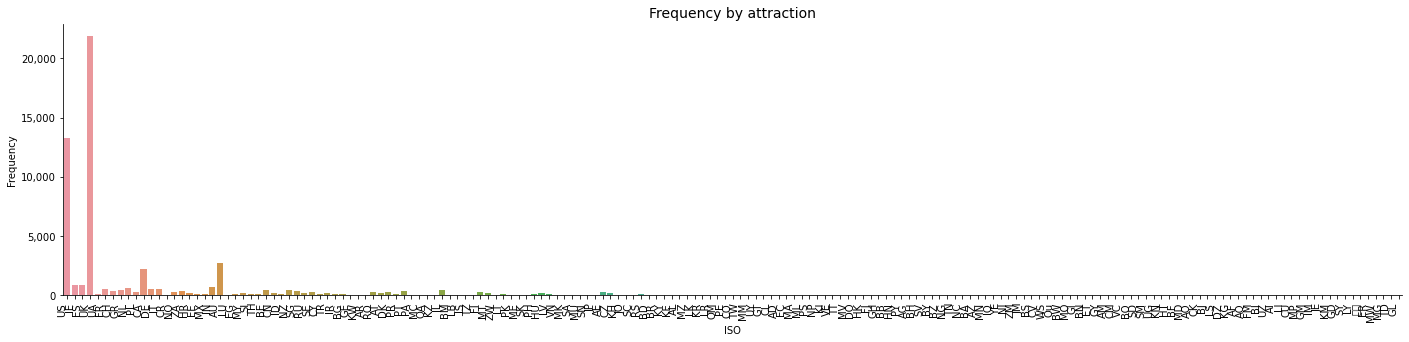

In [23]:
# Frequency by attraction

# Draw
fig, ax = plt.subplots(figsize=(24,5))
g = sns.countplot(x=dsOnlyISO['userISO'], data=dsOnlyISO)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency by attraction", fontsize=plots_Title_fontSize)
plt.xlabel("ISO")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.xticks(rotation=90, ha='right');

In [11]:
numberOfNoIso = 0
listNoIso = []
ds['userISO'] = ds['userISO']

for item in ds['userISO']:
    if (len(item) > 2):
        numberOfNoIso += 1
        listNoIso.append(item)
dsNoISO = pd.DataFrame(listNoIso, columns=['noIso'])
dsNoISO['noIso'].value_counts().head(20)

Deutschland                       21
ישראל                             20
Éire / Ireland                    18
Nederland                         15
Ελλάς                             11
Suomi / Finland                   11
España                            11
الإمارات العربية المتحدة          10
Schweiz/Suisse/Svizzera/Svizra     9
Mauritius / Maurice                7
New Zealand / Aotearoa             7
ປະເທດລາວ                           5
Россия                             5
Norge                              5
Palestinian Territory              4
Κύπρος - Kıbrıs                    4
Asia                               4
Brasil                             4
Ayiti                              3
Sverige                            3
Name: noIso, dtype: int64

In [24]:
ds['userISO'] = np.where(ds['userISO'] == 'Deutschland', 'DE', ds['userISO'])
ds['userISO'] = np.where(ds['userISO'] == 'Nederland', 'NL', ds['userISO'])
ds['userISO'] = np.where(ds['userISO'] == 'Schweiz/Suisse/Svizzera/Svizra', 'CH', ds['userISO'])
ds['userISO'] = np.where(ds['userISO'] == 'Suomi / Finland', 'FI', ds['userISO'])
ds['userISO'] = np.where(ds['userISO'] == 'Éire / Ireland', 'IR', ds['userISO'])


In [25]:
ds.to_excel('userISO.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

2022-12-21 13:46:31.268954
